# Propagacion de la afinidad

In [1]:
from sklearn.cluster import AffinityPropagation
from sklearn import metrics
from sklearn.datasets.samples_generator import make_blobs

In [26]:
centers = [[1,1],[-1,-1],[1,-1]]
X, labels = make_blobs(n_samples=300, centers= centers, cluster_std=0.5, random_state=0)

In [4]:
import matplotlib.pyplot as plt
from itertools import cycle


Bad key "text.kerning_factor" on line 4 in
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


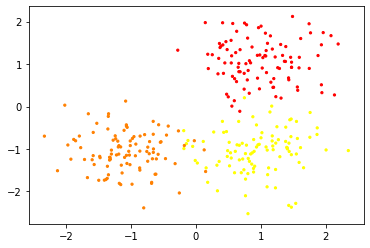

In [5]:
plt.scatter(X[:,0],X[:,1],c= labels, s=5, cmap="autumn")

In [10]:
af = AffinityPropagation(preference=-50).fit(X)

In [11]:
cluster_center_ids = af.cluster_centers_indices_

In [12]:
#labels = af.labels_

In [13]:
n_clust = len(cluster_center_ids)
n_clust

3

In [27]:
def report_affinity_propagation(X):
    af = AffinityPropagation(preference=-50).fit(X)
    cluster_center_ids = af.cluster_centers_indices_
    n_clust = len(cluster_center_ids)
    
    clust_labels = af.labels_
    
    print("Numero estimado de clusters: %d"%n_clust)
    print("Homogeneidad: %0.3f"%metrics.homogeneity_score(labels,clust_labels))
    print("Completitud: %0.3f"%metrics.completeness_score(labels,clust_labels))
    print("V-measure: %0.3f"%metrics.v_measure_score(labels,clust_labels))
    print("R2 ajustado: %0.3f"%metrics.adjusted_rand_score(labels,clust_labels))
    print("Informacion mutua ajustada: %0.3f"%metrics.adjusted_mutual_info_score(labels,clust_labels))
    print("Coeficiente de la silueta: %0.3f"%metrics.silhouette_score(X,labels,metric="sqeuclidean"))
    
    plt.figure(figsize=(16,9))
    plt.clf()
    
    colors = cycle('bgrcmykbgrcmykbgrcmykbgcmyk')
    
    for k, col in zip(range(n_clust), colors):
        class_members = (clust_labels == k)
        clust_center = X[cluster_center_ids[k]]
        plt.plot(X[class_members,0], X[class_members,1], col + '.')
        plt.plot(clust_center[0], clust_center[1], 'o', markerfacecolor= col, markeredgecolor='k', markersize=14)
        for x in X[class_members]:
            plt.plot([clust_center[0], x[0]], [clust_center[1], x[1]],col)
            
    plt.title("Numero estimado de clusters %d"%n_clust)
    plt.show()
    

Numero estimado de clusters: 3
Homogeneidad: 0.872
Completitud: 0.872
V-measure: 0.872
R2 ajustado: 0.912
Informacion mutua ajustada: 0.871
Coeficiente de la silueta: 0.735


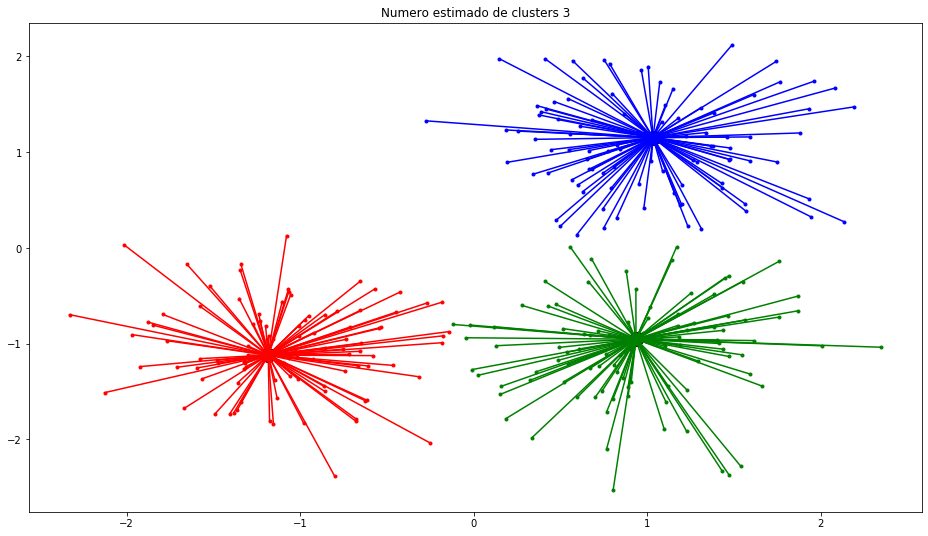

In [28]:
report_affinity_propagation(X)

Numero estimado de clusters: 2


ValueError: Found input variables with inconsistent numbers of samples: [300, 17]

In [31]:
labels

array([0, 1, 1, 0, 0, 1, 2, 2, 1, 0, 2, 0, 0, 2, 0, 2, 2, 2, 2, 2, 0, 0,
       0, 0, 2, 0, 2, 1, 2, 1, 1, 2, 0, 1, 2, 1, 1, 1, 1, 0, 0, 0, 2, 0,
       1, 2, 2, 2, 2, 0, 0, 0, 2, 1, 1, 1, 1, 0, 1, 0, 2, 1, 1, 2, 2, 2,
       2, 0, 1, 0, 1, 2, 0, 0, 2, 2, 1, 1, 0, 2, 1, 0, 2, 1, 1, 0, 0, 1,
       2, 0, 1, 0, 1, 0, 1, 0, 1, 2, 0, 2, 0, 0, 2, 0, 0, 1, 1, 2, 1, 1,
       1, 1, 1, 2, 0, 1, 2, 2, 1, 2, 1, 1, 1, 1, 1, 1, 0, 2, 2, 2, 0, 2,
       2, 1, 0, 1, 0, 2, 1, 0, 2, 2, 2, 0, 2, 0, 1, 2, 2, 1, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 2, 1, 0, 2, 2, 2, 1, 0, 0, 0, 2, 2, 0, 0, 0,
       0, 2, 2, 0, 2, 0, 0, 1, 2, 0, 1, 2, 0, 1, 1, 1, 0, 2, 1, 2, 0, 2,
       0, 2, 0, 0, 2, 1, 1, 1, 1, 0, 2, 2, 0, 1, 1, 1, 0, 2, 0, 0, 2, 0,
       1, 1, 0, 1, 2, 2, 2, 0, 0, 1, 2, 2, 2, 1, 2, 0, 1, 1, 0, 1, 1, 2,
       0, 1, 2, 0, 0, 2, 0, 2, 2, 2, 1, 0, 2, 2, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 2, 2, 1, 0, 0, 1, 1, 1, 2, 1, 2, 1, 1, 2, 2, 2, 1, 2, 0, 2,
       1, 0, 2, 1, 1, 2, 1, 1, 1, 2, 0, 1, 2, 2])

In [32]:
X

array([[ 1.47504421,  0.9243214 ],
       [-0.02204385, -0.80495334],
       [-1.17671587, -1.80823709],
       [ 0.77223375,  1.00873958],
       [ 1.23283122,  0.23187816],
       [-0.92174673, -0.88390948],
       [ 1.65956844, -1.44120941],
       [ 0.33389417, -1.98431234],
       [-1.27143074, -0.79197498],
       [ 1.33614738,  1.20373092],
       [ 1.47123406, -1.13379737],
       [ 0.94839057,  1.20529925],
       [ 0.65271607,  0.92518273],
       [-0.11980203, -0.79925047],
       [ 1.26163833,  0.91422683],
       [ 0.87899009, -0.24086941],
       [ 0.74124048, -1.48941493],
       [ 0.71534397, -0.86504782],
       [ 0.80238551, -1.57971026],
       [ 0.51444771, -0.8425914 ],
       [ 1.38051886,  1.06083751],
       [ 0.42626567,  0.78108998],
       [ 0.74517391,  0.78096285],
       [ 0.78242322,  1.92463186],
       [ 0.76657723, -1.70845306],
       [ 0.82604393,  1.07817448],
       [ 1.1854125 , -0.9289691 ],
       [-1.15450648, -1.8380019 ],
       [ 1.4002824 ,

In [35]:
import pandas as pd

def Test():
    pd.read_csv("https://raw.githubusercontent.com/MinCiencia/Datos-COVID19/master/input/ReporteDiario/CamasHospital_Diario.csv").to_csv("Test.csv")


C:\ProgramData\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [36]:
Test()